In [1]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

red_proteinas=ldata("data/yeast_AP-MS.txt")
red_binarias=ldata("data/yeast_Y2H.txt")
red_literatura=ldata("data/yeast_LIT.txt")
red_prueba=ldata("data/prueba.txt")


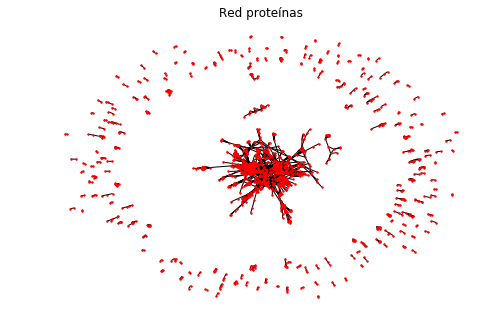

1622

In [5]:
G = nx.Graph()#directed
G.add_edges_from(red_proteinas)
nx.draw(G, with_labels=False, font_weight='bold',node_size=2)
plt.title("Red proteínas")
plt.show()
G.number_of_nodes()


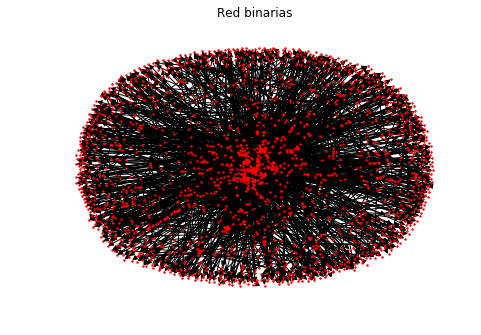

2018

In [10]:
G1 = nx.DiGraph()#directed
G1.add_edges_from(red_binarias)
nx.draw(G1, with_labels=False, font_weight='bold',node_size=2)
plt.title("Red binarias")
plt.show()
G1.number_of_nodes()

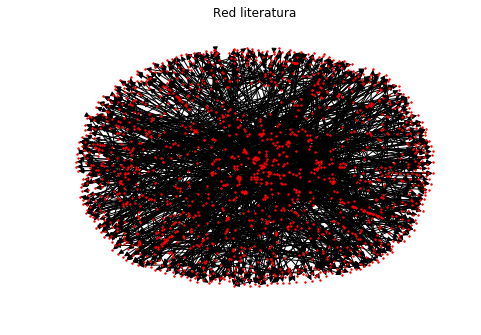

1536

In [12]:
G2 = nx.DiGraph()#directed
G2.add_edges_from(red_literatura)
nx.draw(G2, with_labels=False, font_weight='bold',node_size=2)
plt.title("Red literatura")
plt.show()
G2.number_of_nodes()

In [22]:
G1.number_of_nodes()

2018

In [23]:
G.number_of_edges()


9070

In [24]:
G1.number_of_edges()

2930

In [25]:
G2.number_of_edges()

2925

In [72]:
# for j in red_literatura:

#     if "YER148W" in j and "YGR274C" in j:
#         print(j)
# print(red_literatura[0])
# k=np.transpose(red_literatura[0])
# k
red_literatura_trans=[]
for j in red_literatura:
    red_literatura_trans.append([j[1],j[0]])
a_red_literatura=0
for j in red_literatura_trans:
    for i in red_literatura:
        if i==j:
            a_red_literatura+=1
print(a_red_literatura)


81


In [ ]:
red_prueba_trans=[]
for j in red_prueba:
    red_prueba_trans.append([j[1],j[0]])
a_red_prueba=0
for j in red_prueba_trans:
    for i in red_prueba:
        if i==j:
            a_red_prueba+=1
print(a_red_prueba)


In [27]:
red_proteinas_trans=[]
for j in red_proteinas:
    red_proteinas_trans.append([j[1],j[0]])
a_red_proteinas=0
for j in red_proteinas_trans:
    for i in red_proteinas:
        if i==j:
            a_red_proteinas+=1
print(a_red_proteinas)

0


In [73]:
red_binarias_trans=[]
for j in red_binarias:
    red_binarias_trans.append([j[1],j[0]])
a_red_binarias=0
for j in red_binarias_trans:
    for i in red_binarias:
        if i==j:
            a_red_binarias+=1
print(a_red_binarias)

225


In [74]:
red_prueba_trans=[]
for j in red_prueba:
    red_prueba_trans.append([j[1],j[0]])
a_red_prueba=0
for j in red_prueba_trans:
    for i in red_prueba:
        if i==j:
            a_red_prueba+=1
print(a_red_prueba)

6


In [29]:
H=nx.DiGraph()
H.add_edges_from(red_prueba)

print([H.in_degree("a"),H.out_degree("a")])



[2, 2]


In [75]:
H=nx.DiGraph()
H.add_edges_from(red_prueba)
km=0
for k in H:
    km+=H.in_degree(k)/H.number_of_nodes()
print (km)
H
Km=sum(H.in_degree(k) for k in H)/H.number_of_nodes()
print(Km)



1.5
1.5


In [90]:
def K(H,a_R):
    if a_R >0:
        k_in=sum(H.in_degree(k) for k in H)/H.number_of_nodes()
        k_out=sum(H.out_degree(k) for k in H)/H.number_of_nodes()
        salida=[k_in,k_out]
    else:
        k=sum(H.degree(k) for k in H)/H.number_of_nodes()
        salida=[k]
    return salida
K(H,a_red_prueba)
K(G,a_red_proteinas)
K(G1,a_red_binarias)
K(G2,a_red_literatura)


def Min(H,a_R):
    if a_R >0:
        M=min(H.in_degree(k) for k in H )
        Mbis=min(H.out_degree(k) for k in H )
        MINIMO=[M,Mbis]
        
    else:
        Mini=min(H.degree(k) for k in H)
        MINIMO=[Mini]
    return MINIMO

def Max(H, a_R):
    if a_R >0:
        Ma=max(H.in_degree(k) for k in H)
        Mabis=max(H.out_degree(k) for k in H)
        MAXIMO=[Ma, Mabis]
    else:
        Maxi=max(H.degree(k) for k in H)
        MAXIMO=[Maxi]
    return MAXIMO




In [98]:
data = pd.DataFrame({"Red":["Proteinas","Binarias","Literatura"],"Nodos":[G.number_of_nodes(),G1.number_of_nodes(),G2.number_of_nodes()],
                     "Enlaces":[G.number_of_edges(),G1.number_of_edges(),G2.number_of_edges()],
                     "Dirigida":["No","Sí","Sí"],"Grado medio ([in, out])":[K(G,a_red_proteinas),K(G1,a_red_binarias),K(G2,a_red_literatura)],"Grado máximo([in,out])":[Max(G,a_red_proteinas),Max(G1,a_red_binarias),Max(G2,a_red_literatura)],"Grado mínimo([in,out])":[Min(G,a_red_proteinas),Min(G1,a_red_binarias),Min(G2,a_red_literatura)],"Densidad": [1,2,3], "Clustering local":[1,2,3], "Clustering global":[1,2,3], })
data

,Red,Nodos,Enlaces,Dirigida,"Grado medio ([in, out])","Grado máximo([in,out])","Grado mínimo([in,out])",Densidad,Clustering local,Clustering global
0,Proteinas,1622,9070,No,[11.183723797780518],[127],[1],1,1,1
1,Binarias,2018,2930,Sí,"[1.4519326065411298, 1.4519326065411298]","[66, 38]","[0, 0]",2,2,2
2,Literatura,1536,2925,Sí,"[1.904296875, 1.904296875]","[23, 35]","[0, 0]",3,3,3
